# 2008 US Flight 
# Data to avoid delays
## by Abderrahman BENYAHYA

## Investigation Overview

> When you organize a trip, you want to avoid delays. 

> For flights, it is much more difficult to know in advance what kind of flight to avoid.

> Hopefully, there are Data on US flights that give information for each flight that can be used to have predictive factor that not only cause delays but also, orgin, destination, date, days of week and distance.

> When comparing each factor with the delay lenghth and occurence, we can have an idea of the flights to avoid.

## Dataset Overview

> The Dataset is composed of the information on internal US Flights for the year 2008: the date of the flight, the cities of origin and destination, the actual time of departure and arrival but also the delays, the causes of delays and information on the distance. 

>Because we wanted to focuse on delays on arrival, the data was cleaned from cancellation and diverted flight

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
explore = pd.read_csv('exploration_flight.csv')

## What is the proportion of flights on delay?




>###  The visualization shows that the majority of flight are ahead time, few are exactly on time and non negligent part are late.

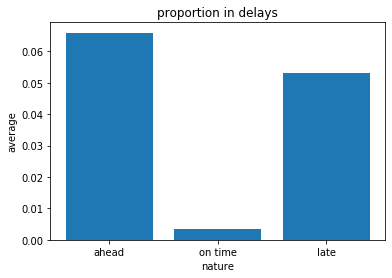

In [3]:
ahead = (explore.ArrDelay<0).sum() / (explore.ArrDelay).sum()
on_time = (explore.ArrDelay == 0).sum() / (explore.ArrDelay).sum()
late = (explore.ArrDelay>0).sum() / (explore.ArrDelay).sum()
locations = [1, 2, 3]
heights = [ahead, on_time, late]
labels = ["ahead", "on time", "late"]
plt.bar(locations, heights, tick_label=labels)
plt.title('proportion in delays')
plt.xlabel('nature')
plt.ylabel('average');


> ### An insight of the distribution of delay on arrival shows that the majority of flight are near to the expected time of arrival and that there are less occurence with the augmentation of delays.

Text(0.5, 1.0, 'Number of flights by minutes of delays')

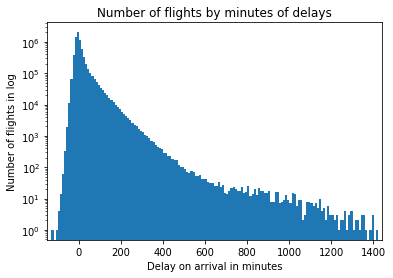

In [4]:
bins = np.arange(explore.ArrDelay.min(),explore.ArrDelay.max()+10,10)
plt.hist(data=explore, x='ArrDelay', bins=bins);
plt.yscale('log')
plt.xlim(-150, 1440)
plt.xlabel('Delay on arrival in minutes')
plt.ylabel('Number of flights in log')
plt.title('Number of flights by minutes of delays')

## Which cities show more delays?

> ### The next question of interest for the travelers is to know what are the cities of origin for whom the proportion of delays are the most important. 


> #### Apart from PUB for which only two flights were reported, the origin cities for which there are in proportion more delays on arrival are:

>> #### AKN, ITH, OTH, DLG, GST, STX, PIR, YKM and EYW

Text(0.5, 1.0, 'The proportion of delayed flights for the ten "worst" origin cities')

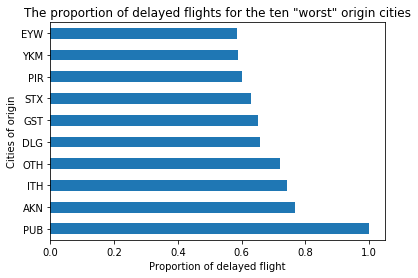

In [5]:
late_arrivals = explore.query('ArrDelay > 0')
(late_arrivals.Origin.value_counts() / explore.Origin.value_counts()).sort_values(ascending=False)[:10].plot.barh()
plt.xlabel('Proportion of delayed flight')
plt.ylabel('Cities of origin')
plt.title('The proportion of delayed flights for the ten "worst" origin cities')

>> #### The destination that have most delay in proportion is PIR then OTH,ADK,SLE,GST,ACK,STX,YKM,EYW,ACY

Text(0.5, 1.0, 'The proportion of delayed flights for the ten "worst" destination cities')

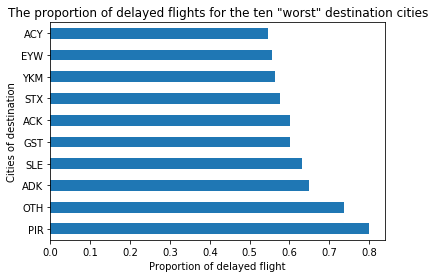

In [13]:
(late_arrivals.Dest.value_counts() / explore.Dest.value_counts()).sort_values(ascending=False)[:10].plot.barh()
plt.xlabel('Proportion of delayed flight')
plt.ylabel('Cities of destination')
plt.title('The proportion of delayed flights for the ten "worst" destination cities')

##  What are the parameters that predicted the best the delay on arrival?



> ### Distance of flights

>> #### It is not a parameter that corrolates delay on arrival, on the contrary, with distance, the lenght of delay is decreasing

Text(0.5, 1.0, 'Number of delayed flights by the distance')

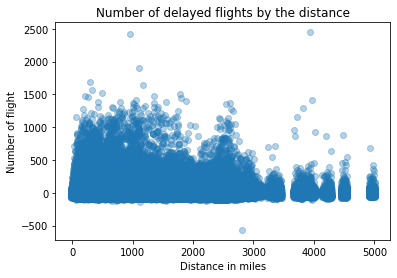

In [14]:
#We try with the seaborn library using jitters and alpha to see the proportion
sb.regplot(data = explore, x = 'Distance', y = 'ArrDelay', fit_reg = False,
           x_jitter = 50, y_jitter = 50, scatter_kws = {'alpha' : 1/3})
plt.xlabel('Distance in miles')
plt.ylabel('Number of flight')
plt.title('Number of delayed flights by the distance')

> ### Days of the weeks

>> #### First we can see that there is an equal distribution of flights during the week but less on week end

Text(0.5, 1.0, 'Number of flights by day of the week')

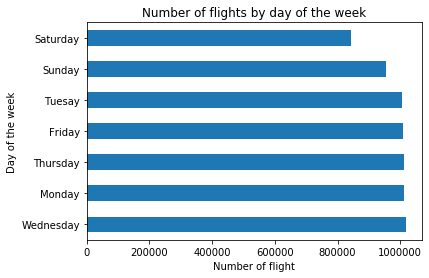

In [8]:
CountWeekDays = pd.value_counts(explore['DayOfWeek'].values, sort=True)
CountWeekDays.plot.barh()
plt.xlabel('Number of flight')
plt.ylabel('Day of the week')
plt.title('Number of flights by day of the week')


>> #### We can see that there is no obvious relation between day of the week and length of delay. 

Text(0.5, 1.0, 'Length of delay by day of the week')

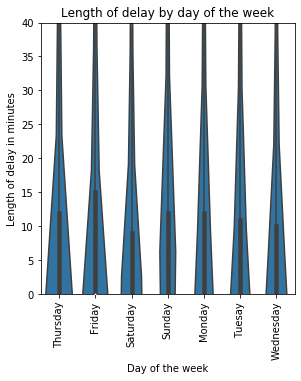

In [9]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
bins = np.arange(0,40+10,10)

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = explore, x = 'DayOfWeek', y = 'ArrDelay', color = base_color, bins=bins)
plt.xticks(rotation = 90)
plt.ylim(0,40)
plt.xlabel('Day of the week')
plt.ylabel('Length of delay in minutes')
plt.title('Length of delay by day of the week')



> ### Reported cause of delay 

>> ##### CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay

>> We can see first that among the causes, security and weather are far the less occcurence and the main cause are Aircraft, NAS and Carrier

>> Interestingly, the weather cause more length in delay in proportion

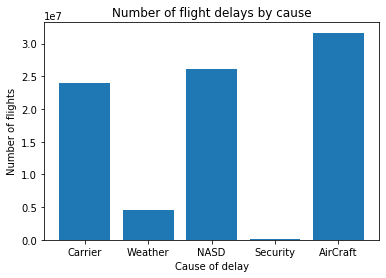

In [10]:
CarrierDelay = explore.CarrierDelay.sum()        
WeatherDelay = explore.WeatherDelay.sum()
NASDelay= explore.NASDelay.sum()
SecurityDelay = explore.SecurityDelay.sum()      
LateAircraftDelay = explore.LateAircraftDelay.sum()

locations = [1, 2, 3, 4, 5]
heights = [CarrierDelay, WeatherDelay, NASDelay,SecurityDelay, LateAircraftDelay ]
labels = ["Carrier", "Weather", "NASD", "Security", "AirCraft"]
plt.bar(locations, heights, tick_label=labels)
plt.title('Number of flight delays by cause')
plt.xlabel('Cause of delay')
plt.ylabel('Number of flights');



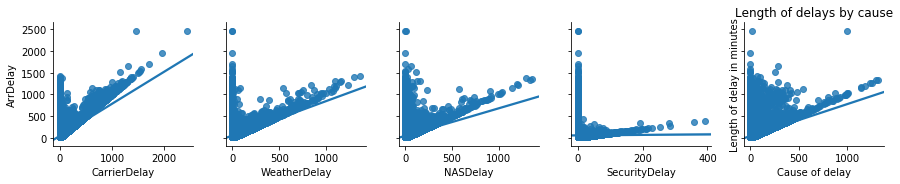

In [11]:
g = sb.PairGrid(data = late_arrivals, x_vars = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
                y_vars = ['ArrDelay'])
g.map(sb.regplot)
plt.title('Length of delays by cause')
plt.xlabel('Cause of delay')
plt.ylabel('Length of delay in minutes');


>> #### When we compare the five causes with the length of delay, it appear clear that the Aircraft and Carrier are the most important cause and the security the less one 